In [1]:
# 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시 , 하차인원 출력
# 출근 시간대 : 07:00 ~08:59
# 사용 파일 : subway.xls
# 07:00~07:59 하차 : index[11], 08:00~08:59 하차 : index[13]
# 1호선, 2호선, 3호선, 4호선, 5호선, 6호선, 7호선
# 하차인원 1,000단위로 콤마 찍어서 구분
# 7개의 지하철 역을 막대 그래프로 표시
# Bar chart의 X축은 (노선 + 지하철 역이름)을 표시, y축은 인원수를 표시


import pandas as pd
from tabulate import tabulate
import koreanize_matplotlib



In [2]:
df=pd.read_excel('subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0,1])
print(df.head())

                 사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2024-06                1호선                150                서울역   
1            2024-06                1호선                151                 시청   
2            2024-06                1호선                152                 종각   
3            2024-06                1호선                153               종로3가   
4            2024-06                1호선                154               종로5가   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               654  20             8,727  9,083            13,812  56,637   
1                74   0             2,105  5,374             4,050  25,949   
2               132   7             4,291  5,787             4,312  32,747   
3               206  13             4,296 

In [3]:
print(df.columns)
print(df[('호선명',  'Unnamed: 1_level_1')])

MultiIndex([(              '사용월',  'Unnamed: 0_level_1'),
            (              '호선명',  'Unnamed: 1_level_1'),
            (              '역ID',  'Unnamed: 2_level_1'),
            (             '지하철역',  'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                  '승차'),
            ('04:00:00~04:59:59',                  '하차'),
            ('05:00:00~05:59:59',                  '승차'),
            ('05:00:00~05:59:59',                  '하차'),
            ('06:00:00~06:59:59',                  '승차'),
            ('06:00:00~06:59:59',                  '하차'),
            ('07:00:00~07:59:59',                  '승차'),
            ('07:00:00~07:59:59',                  '하차'),
            ('08:00:00~08:59:59',                  '승차'),
            ('08:00:00~08:59:59',                  '하차'),
            ('09:00:00~09:59:59',                  '승차'),
            ('09:00:00~09:59:59',                  '하차'),
            ('10:00:00~10:59:59',                  '승차'),
            ('

In [4]:
# 07:00~07:59 하차 : index[11], 08:00~08:59 하차 : index[13]
comnute_time_df=df.iloc[:,[1, 3, 11, 13]]
print(tabulate(comnute_time_df.head(), headers='keys', tablefmt='psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   | ('07:00:00~07:59:59', '하차')   | ('08:00:00~08:59:59', '하차')   |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               | 115,372                         | 224,224                         |
|  1 | 1호선                              | 시청                                 | 71,550                          | 183,563                         |
|  2 | 1호선                              | 종각                                 | 106,889                         | 249,815                         |
|  3 | 1호선                              | 종로3가                              | 28,024                          | 65,287

In [5]:
print(comnute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  하차                    object
08:00:00~08:59:59  하차                    object
dtype: object


In [6]:
comnute_time_df[('07:00:00~07:59:59', '하차')]=comnute_time_df[('07:00:00~07:59:59', '하차')].apply(lambda x: x.replace(',',''))
comnute_time_df[('08:00:00~08:59:59', '하차')]=comnute_time_df[('08:00:00~08:59:59', '하차')].apply(lambda x: x.replace(',',''))
print(tabulate(comnute_time_df.head(), headers='keys', tablefmt='psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   |   ('07:00:00~07:59:59', '하차') |   ('08:00:00~08:59:59', '하차') |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               |                          115372 |                          224224 |
|  1 | 1호선                              | 시청                                 |                           71550 |                          183563 |
|  2 | 1호선                              | 종각                                 |                          106889 |                          249815 |
|  3 | 1호선                              | 종로3가                              |                           28024 |       

C:\Users\KDP15\AppData\Local\Temp\ipykernel_7172\1795271430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comnute_time_df[('07:00:00~07:59:59', '하차')]=comnute_time_df[('07:00:00~07:59:59', '하차')].apply(lambda x: x.replace(',',''))
C:\Users\KDP15\AppData\Local\Temp\ipykernel_7172\1795271430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comnute_time_df[('08:00:00~08:59:59', '하차')]=comnute_time_df[('08:00:00~08:59:59', '하차')].apply(lambda x: x.replace(',',''))


In [7]:
comnute_time_df = comnute_time_df.astype({('07:00:00~07:59:59', '하차'):'int64'})
comnute_time_df = comnute_time_df.astype({('08:00:00~08:59:59', '하차'):'int64'})
print(comnute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  하차                     int64
08:00:00~08:59:59  하차                     int64
dtype: object


In [8]:
row_sum_df= comnute_time_df.sum(axis=1, numeric_only=True)

In [9]:
comnute_time_df['출근시간 총 하차 인원'] = row_sum_df

In [10]:
station_list=[]

In [11]:
number_list=[]

In [12]:
#반복문
line_names = [f'{i}호선' for i in range(1, 8)]
for line in line_names:
    lineDF=comnute_time_df[comnute_time_df[('호선명', 'Unnamed: 1_level_1')]== line]
    max_index=lineDF['출근시간 총 하차 인원'].idxmax()
    line_name, line_station, line_number = comnute_time_df.iloc[max_index, [0, 1, 4]]
    print(f'출근 시간대 {line_name} 최대 하차역: {line_station}역, 하차인원: {line_number:,}명')
    station_list.append(line_name+ ' '+line_station)
    number_list.append(line_number)

출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 356,704명
출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 488,949명
출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 318,850명
출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 224,078명
출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 340,464명
출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 131,646명
출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 494,848명


In [13]:
station_list

['1호선 종각',
 '2호선 역삼',
 '3호선 양재(서초구청)',
 '4호선 충무로',
 '5호선 여의도',
 '6호선 공덕',
 '7호선 가산디지털단지']

In [14]:
number_list

[356704, 488949, 318850, 224078, 340464, 131646, 494848]

In [15]:
import matplotlib.pyplot as plt

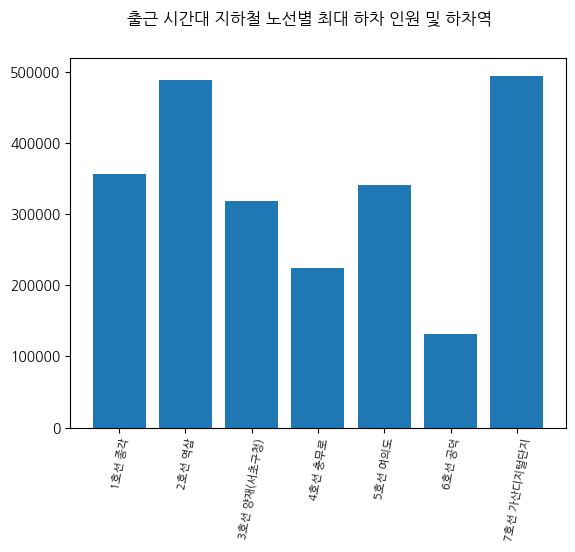

In [18]:
plt.figure(dpi=100)
plt.bar(range(len(station_list)), number_list)
plt.xticks(range(len(station_list)),station_list, rotation=80, fontsize=8)
plt.suptitle('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.show()